# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
# Shapes and Number of Rows and Columns of each dataframe
print(f'Shape of df_hh_income: {df_hh_income.shape}')
print(f'Shape of df_pct_poverty: {df_pct_poverty.shape}')
print(f'Shape of df_pct_completed_hs: {df_pct_completed_hs.shape}')
print(f'Shape of df_share_race_city: {df_share_race_city.shape}')
print(f'Shape of df_fatalities: {df_fatalities.shape}')

Shape of df_hh_income: (29322, 3)
Shape of df_pct_poverty: (29329, 3)
Shape of df_pct_completed_hs: (29329, 3)
Shape of df_share_race_city: (29268, 7)
Shape of df_fatalities: (2535, 14)


In [ ]:
# Column names of each dataframe
print(f'Columns of df_hh_income: {", ".join(df_hh_income.columns.tolist())}')
print(f'Columns of df_pct_poverty: {", ".join(df_pct_poverty.columns.tolist())}')
print(f'Columns of df_pct_completed_hs: {", ".join(df_pct_completed_hs.columns.tolist())}')
print(f'Columns of df_share_race_city: {", ".join(df_share_race_city.columns.tolist())}')
print(f'Columns of df_fatalities: {", ".join(df_fatalities.columns.tolist())}')

Columns of df_hh_income: Geographic Area, City, Median Income
Columns of df_pct_poverty: Geographic Area, City, poverty_rate
Columns of df_pct_completed_hs: Geographic Area, City, percent_completed_hs
Columns of df_share_race_city: Geographic area, City, share_white, share_black, share_native_american, share_asian, share_hispanic
Columns of df_fatalities: id, name, date, manner_of_death, armed, age, gender, race, city, state, signs_of_mental_illness, threat_level, flee, body_camera


#### Exploring the 2015 Median Household Income Dataframe

In [ ]:
df_hh_income.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [ ]:
df_hh_income.info() # There are null values in the Median Income column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


In [ ]:
df_hh_income.duplicated().any() # There are no duplicates for df_hh_income

False

#### Exploring the Poverty Percentage Dataframe


In [ ]:
df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [ ]:
df_pct_poverty.info() # There are no null values in df_pct_poverty

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [ ]:
df_pct_poverty.duplicated().any() # There are no duplicates

False

#### Exploring the Percentage of People who completed Highschool over 25 years old Dataframe


In [ ]:
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [ ]:
df_pct_completed_hs.info() # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [ ]:
df_pct_completed_hs.duplicated().any() # There are no duplicates

False

#### Exploring the Share of Race by City Dataframe


In [ ]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [ ]:
df_share_race_city.info() # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [ ]:
df_share_race_city.duplicated().any() # There are no duplicates

False

#### Exploring the Number of Fatalities Dataframe


In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
df_fatalities.info() # There are many null values in the armed, age, race, and flee columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [ ]:
df_fatalities.duplicated().any() # There are no duplicates

False

#### Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [ ]:
df_hh_income['Median Income'].fillna(0, inplace=True)
df_hh_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29322 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


In [ ]:
# Since the missing columns only make up to around 11% of the data, I decided to just remove all NaN values (filling it will ruin data integrity)
df_fatalities.dropna(inplace=True)
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2254 non-null   int64  
 1   name                     2254 non-null   object 
 2   date                     2254 non-null   object 
 3   manner_of_death          2254 non-null   object 
 4   armed                    2254 non-null   object 
 5   age                      2254 non-null   float64
 6   gender                   2254 non-null   object 
 7   race                     2254 non-null   object 
 8   city                     2254 non-null   object 
 9   state                    2254 non-null   object 
 10  signs_of_mental_illness  2254 non-null   bool   
 11  threat_level             2254 non-null   object 
 12  flee                     2254 non-null   object 
 13  body_camera              2254 non-null   bool   
dtypes: bool(2), float64(1), 

#### Fixing Data Types

In [ ]:
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].apply(lambda x:str(x).replace('-','0')).astype('float64')
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [ ]:
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].apply(lambda x:str(x).replace('-','0')).astype('float64')
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29329 non-null  object 
 1   City                  29329 non-null  object 
 2   percent_completed_hs  29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [ ]:
df_share_race_city['share_asian'] = df_share_race_city['share_asian'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')
df_share_race_city['share_black'] = df_share_race_city['share_black'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')
df_share_race_city['share_hispanic'] = df_share_race_city['share_hispanic'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')
df_share_race_city['share_native_american'] = df_share_race_city['share_native_american'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')
df_share_race_city['share_white'] = df_share_race_city['share_white'].apply(lambda x:str(x).replace('(X)','0')).astype('float64')
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29268 non-null  float64
 3   share_black            29268 non-null  float64
 4   share_native_american  29268 non-null  float64
 5   share_asian            29268 non-null  float64
 6   share_hispanic         29268 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [ ]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2254 non-null   int64         
 1   name                     2254 non-null   object        
 2   date                     2254 non-null   datetime64[ns]
 3   manner_of_death          2254 non-null   object        
 4   armed                    2254 non-null   object        
 5   age                      2254 non-null   float64       
 6   gender                   2254 non-null   object        
 7   race                     2254 non-null   object        
 8   city                     2254 non-null   object        
 9   state                    2254 non-null   object        
 10  signs_of_mental_illness  2254 non-null   bool          
 11  threat_level             2254 non-null   object        
 12  flee                     2254 non-

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
pct_poverty_by_state = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False)
pct_poverty_by_state.head()

Geographic Area
MS   26.88
AZ   25.27
GA   23.66
AR   22.96
NM   22.51
Name: poverty_rate, dtype: float64

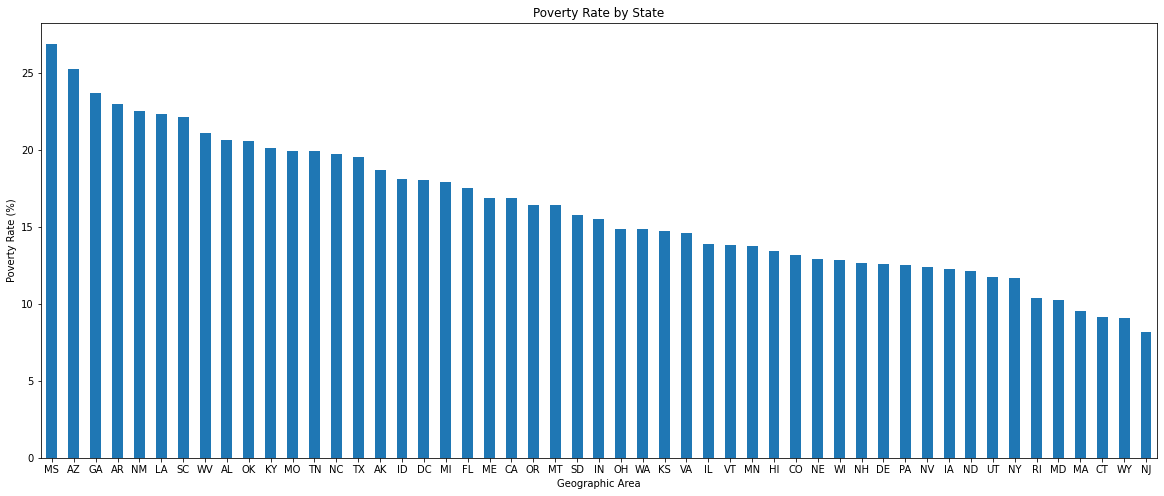

In [ ]:
pct_poverty_by_state.plot(
    kind='bar',
    figsize=(20,8),
    title = 'Poverty Rate by State',
    rot=0
)

plt.ylabel('Poverty Rate (%)')
plt.show()

On average, the State of Mississippi has the highest poverty rate (26.8%) and the State of New Jersey has the lowest poverty rate (8.16%)

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
pct_hs_by_state = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values()
pct_hs_by_state.head()

Geographic Area
TX   74.09
MS   78.47
GA   78.63
NM   78.97
LA   79.12
Name: percent_completed_hs, dtype: float64

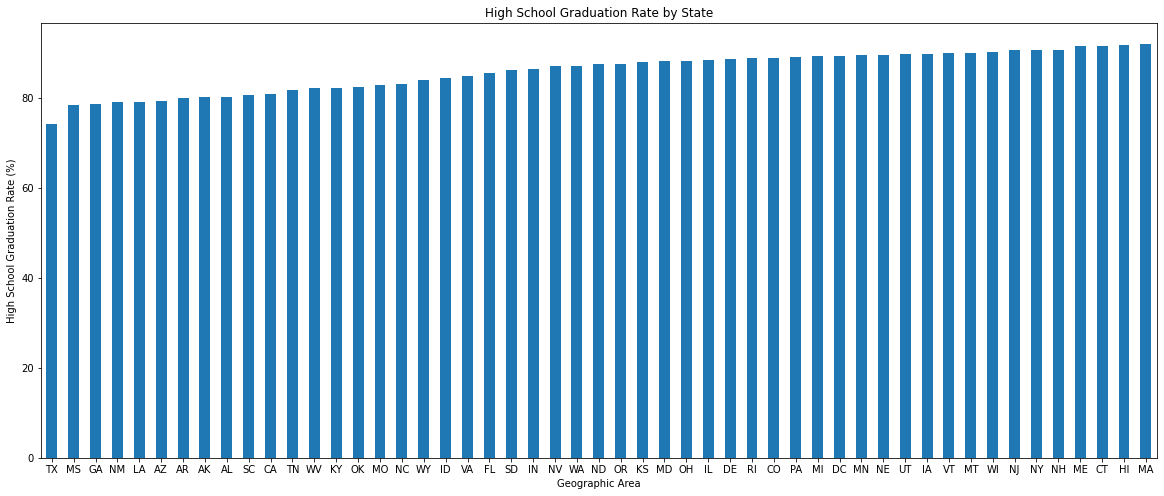

In [ ]:
pct_hs_by_state.plot(
    kind='bar',
    figsize=(20,8),
    title = 'High School Graduation Rate by State',
    rot=0
)

plt.ylabel('High School Graduation Rate (%)')
plt.show()

On average, the state with the lowest high school graduation rate is Texas (74.09%) and the state with the highest high school graduation rate is Massachusetts (92.03%)

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [ ]:
pct_hs_by_state.sort_index(inplace=True) 
pct_poverty_by_state.sort_index(inplace=True)
pct_hs_by_state.index==pct_poverty_by_state.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

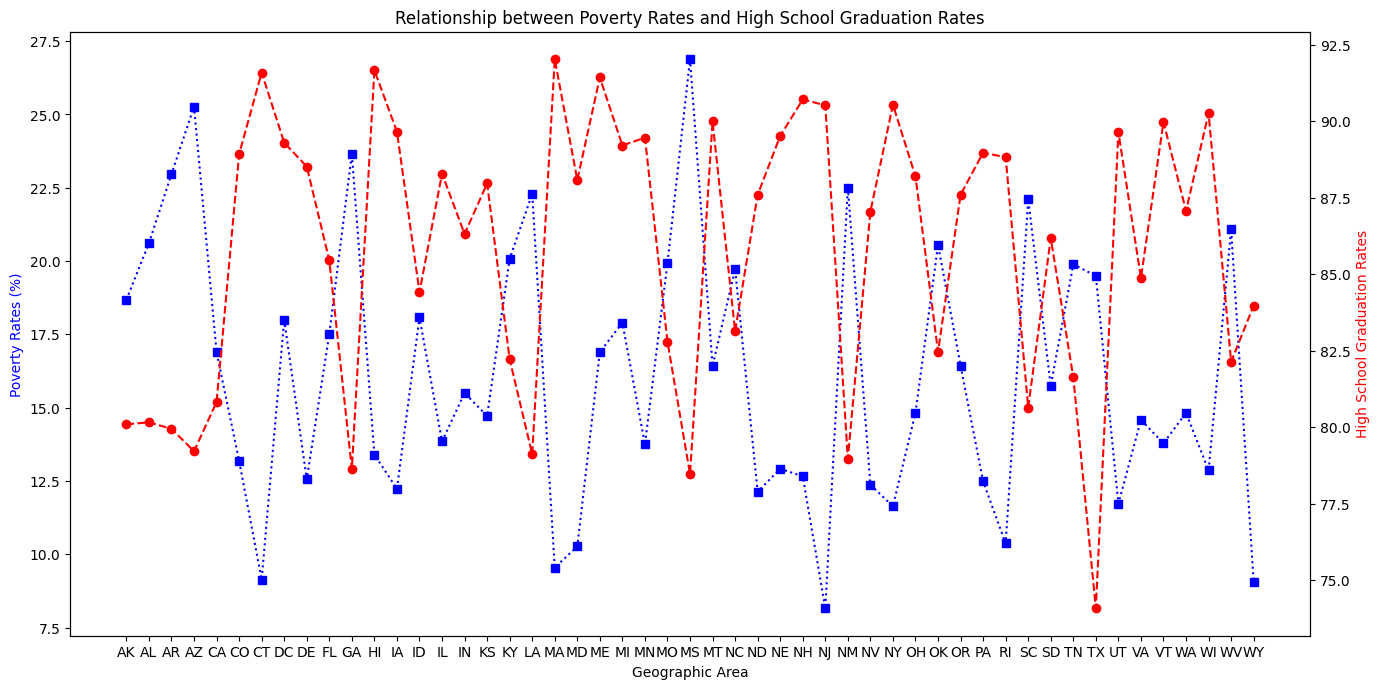

In [ ]:
plt.figure(figsize=(16,8), dpi=100)
plt.title('Relationship between Poverty Rates and High School Graduation Rates')

poverty_axis = plt.gca()
hs_grad_axis = poverty_axis.twinx()

poverty_axis.set_xlabel('Geographic Area')
poverty_axis.set_ylabel('Poverty Rates (%)', color='blue')
hs_grad_axis.set_ylabel('High School Graduation Rates', color='red')

poverty_axis.plot(pct_poverty_by_state.index, pct_poverty_by_state, color='blue', linestyle='dotted', marker='s')
hs_grad_axis.plot(pct_hs_by_state.index, pct_hs_by_state, color='red', linestyle='dashed', marker='o')

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [ ]:
poverty_hs_comparison = pd.concat([pct_hs_by_state, pct_poverty_by_state], axis=1)
poverty_hs_comparison

,percent_completed_hs,poverty_rate
Geographic Area,,
AK,80.10,18.68
AL,80.16,20.61
AR,79.95,22.96
AZ,79.22,25.27
CA,80.82,16.89
CO,88.93,13.19
CT,91.59,9.14
DC,89.30,18.00
DE,88.52,12.56


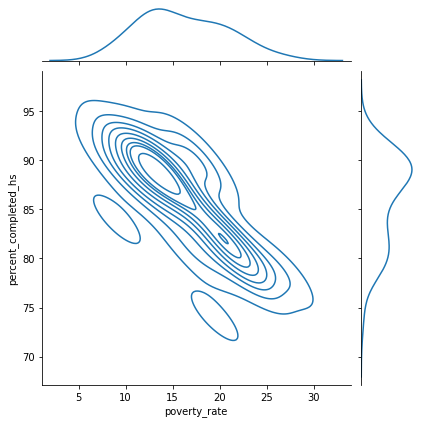

In [ ]:
sns.jointplot(
    data = poverty_hs_comparison, 
    y='percent_completed_hs', 
    x='poverty_rate', 
    kind='kde',
)

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

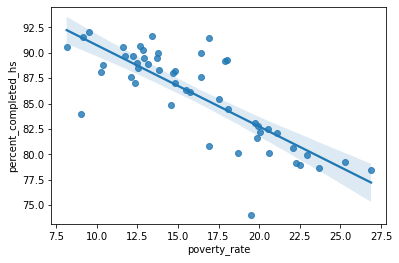

In [ ]:
sns.regplot(
    data = poverty_hs_comparison, 
    y='percent_completed_hs', 
    x='poverty_rate', 
)

I think through these visualizations, we can conclude that higher high school graduation rates results in lower poverty ratio

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [ ]:
race_by_state = df_share_race_city.groupby('Geographic area')[['share_white', 'share_black', 'share_asian', 'share_hispanic', 'share_native_american']].mean()
race_by_state

,share_white,share_black,share_asian,share_hispanic,share_native_american
Geographic area,,,,,
AK,45.26,0.56,1.38,2.13,45.48
AL,72.51,23.32,0.48,2.98,0.66
AR,78.45,16.30,0.48,4.27,0.76
AZ,59.93,0.95,0.73,20.14,28.59
CA,71.54,2.68,5.54,29.51,1.72
CO,87.77,0.92,1.15,17.90,1.62
CT,86.11,4.99,2.99,7.98,0.66
DC,38.50,50.70,3.50,9.10,0.30
DE,76.25,15.39,2.00,7.42,0.52


In [ ]:
# Normalize each columns (since the average)
sum_per_state = race_by_state['share_asian'] + race_by_state['share_black'] + race_by_state['share_hispanic'] + race_by_state['share_native_american'] + race_by_state['share_white']  
race_by_state['share_asian'] = race_by_state['share_asian'] / sum_per_state * 100
race_by_state['share_black'] = race_by_state['share_black'] / sum_per_state * 100
race_by_state['share_hispanic'] = race_by_state['share_hispanic'] / sum_per_state * 100
race_by_state['share_native_american'] = race_by_state['share_native_american'] / sum_per_state * 100
race_by_state['share_white'] = race_by_state['share_white'] / sum_per_state * 100

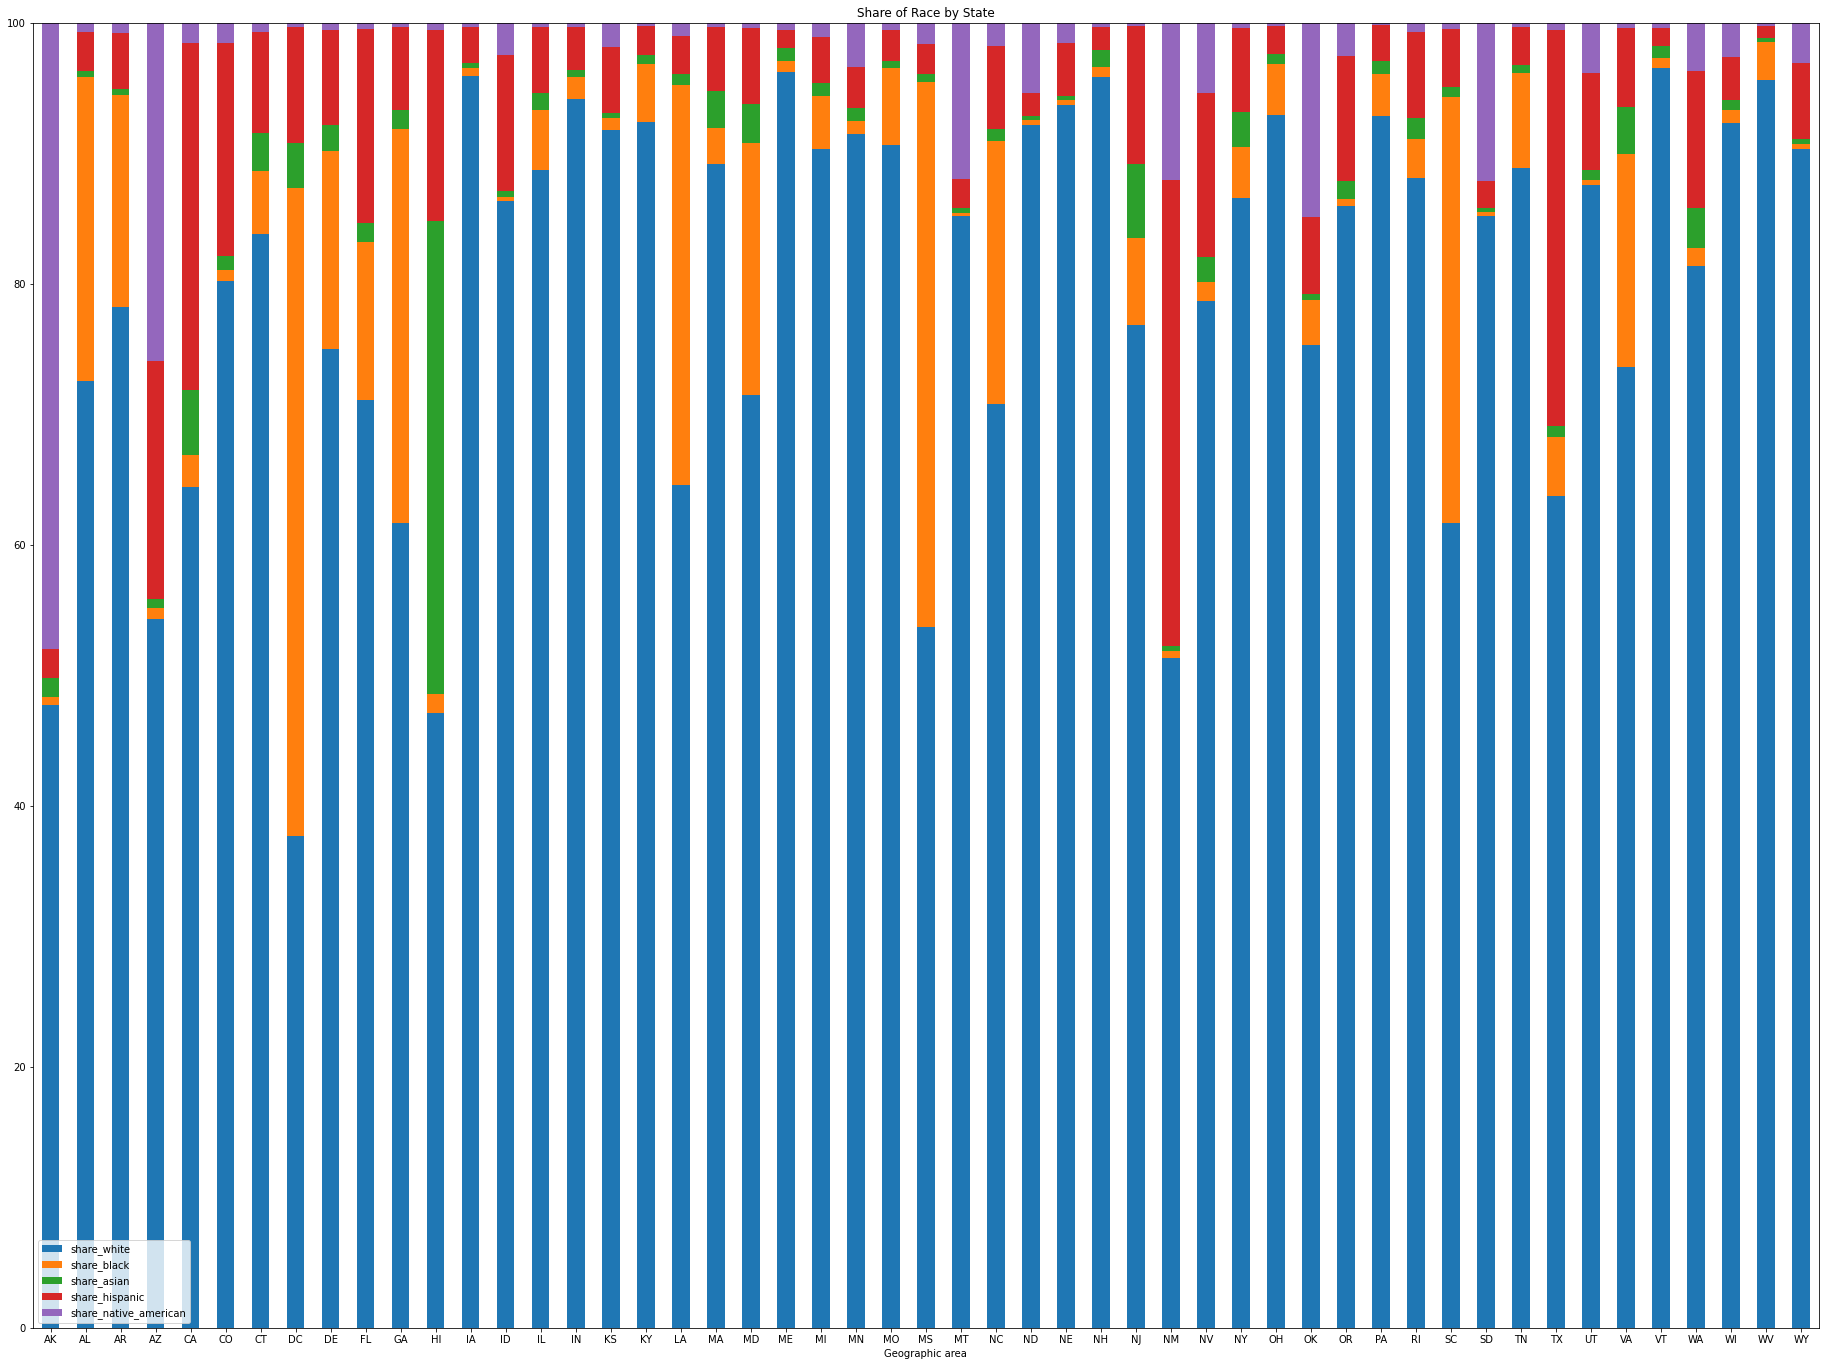

In [ ]:
race_by_state.plot(
    kind='bar',
    figsize = (32,24),
    title = 'Share of Race by State',
    rot=0,
    stacked=True,
    ylim=(0,100),
)

# Create Donut Chart by of People Killed by Race

In [ ]:
victims_by_race = df_fatalities['race'].value_counts().rename({'W':'White','B':'Black','H':'Hispanic','A':'Asian','N':'Native American','O':'Others'})
victims_by_race

White              1168
Black               592
Hispanic            401
Asian                36
Native American      29
Others               28
Name: race, dtype: int64

In [ ]:
px.pie(
    names = victims_by_race.index,
    values = victims_by_race,
    title = 'Victims by Race',
    hole = 0.4
)

I suppose it made sense that more than 50% of the victims are white, because the share race across most states have at least 70% white people

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [ ]:
victims_by_sex = df_fatalities['gender'].value_counts().rename({'M':'Male','F':'Female'})
victims_by_sex

Male      2160
Female      94
Name: gender, dtype: int64

In [ ]:
px.pie(
    values = victims_by_sex,
    names = victims_by_sex.index,
    title = 'Victims by Sex'
)

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [ ]:
px.box(
    df_fatalities[df_fatalities['gender']=='M'],
    x='manner_of_death', 
    y='age',
    color='manner_of_death',
    title = 'Age and Manner of Death (Male)'
)

In [ ]:
px.box(
    df_fatalities[df_fatalities['gender']=='F'],
    x='manner_of_death', 
    y='age',
    color='manner_of_death',
    title = 'Age and Manner of Death (Female)'
)

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [ ]:
armed_status = df_fatalities['armed'].value_counts()
armed_status

gun                                 1247
knife                                324
unarmed                              165
vehicle                              158
toy weapon                           102
                                    ... 
baseball bat and fireplace poker       1
chain saw                              1
pick-axe                               1
flagpole                               1
pen                                    1
Name: armed, Length: 67, dtype: int64

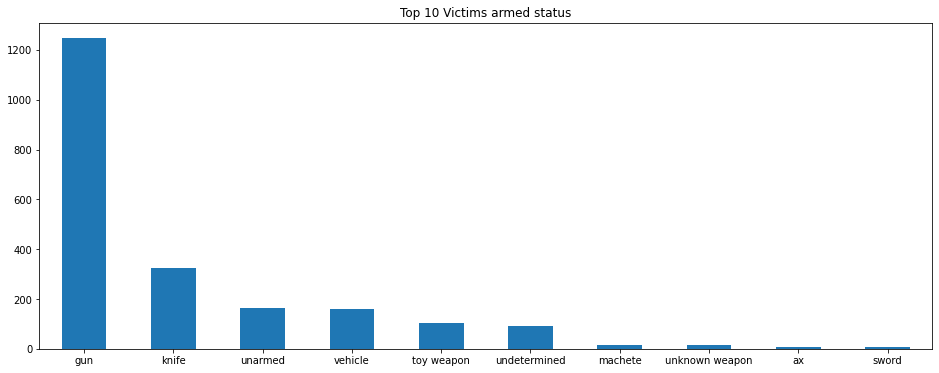

In [ ]:
armed_status[:10].plot(
    kind='bar',
    figsize = (16,6),
    title = 'Top 10 Victims armed status',
    rot=0,
)

In [ ]:
armed_vs_unarmed = pd.Series({
    'armed':len(df_fatalities[df_fatalities['armed']!='unarmed']),
    'unarmed':len(df_fatalities[df_fatalities['armed']=='unarmed'])
})
armed_vs_unarmed

armed      2089
unarmed     165
dtype: int64

In [ ]:
px.pie(
    names = armed_vs_unarmed.index,
    values = armed_vs_unarmed.values,
    title = 'Armed vs Unarmed Percentage'
)

Most victims are armed when they got killed by the police

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
under_25 = len(df_fatalities[df_fatalities['age']<25])/len(df_fatalities)*100
print(f'{under_25:.2f}% of police killing victims are under the age of 25')

18.72% of police killing victims are under the age of 25


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

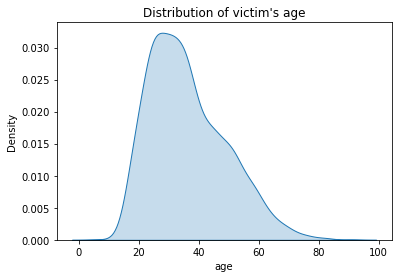

In [ ]:
plt.title("Distribution of victim's age")
sns.kdeplot(data=df_fatalities, x='age', fill=True)
plt.show()

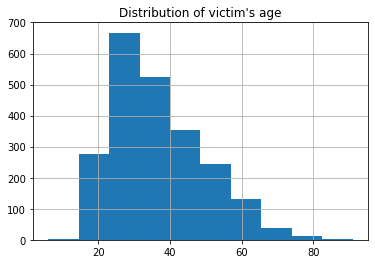

In [ ]:
plt.title("Distribution of victim's age")
df_fatalities['age'].hist()
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

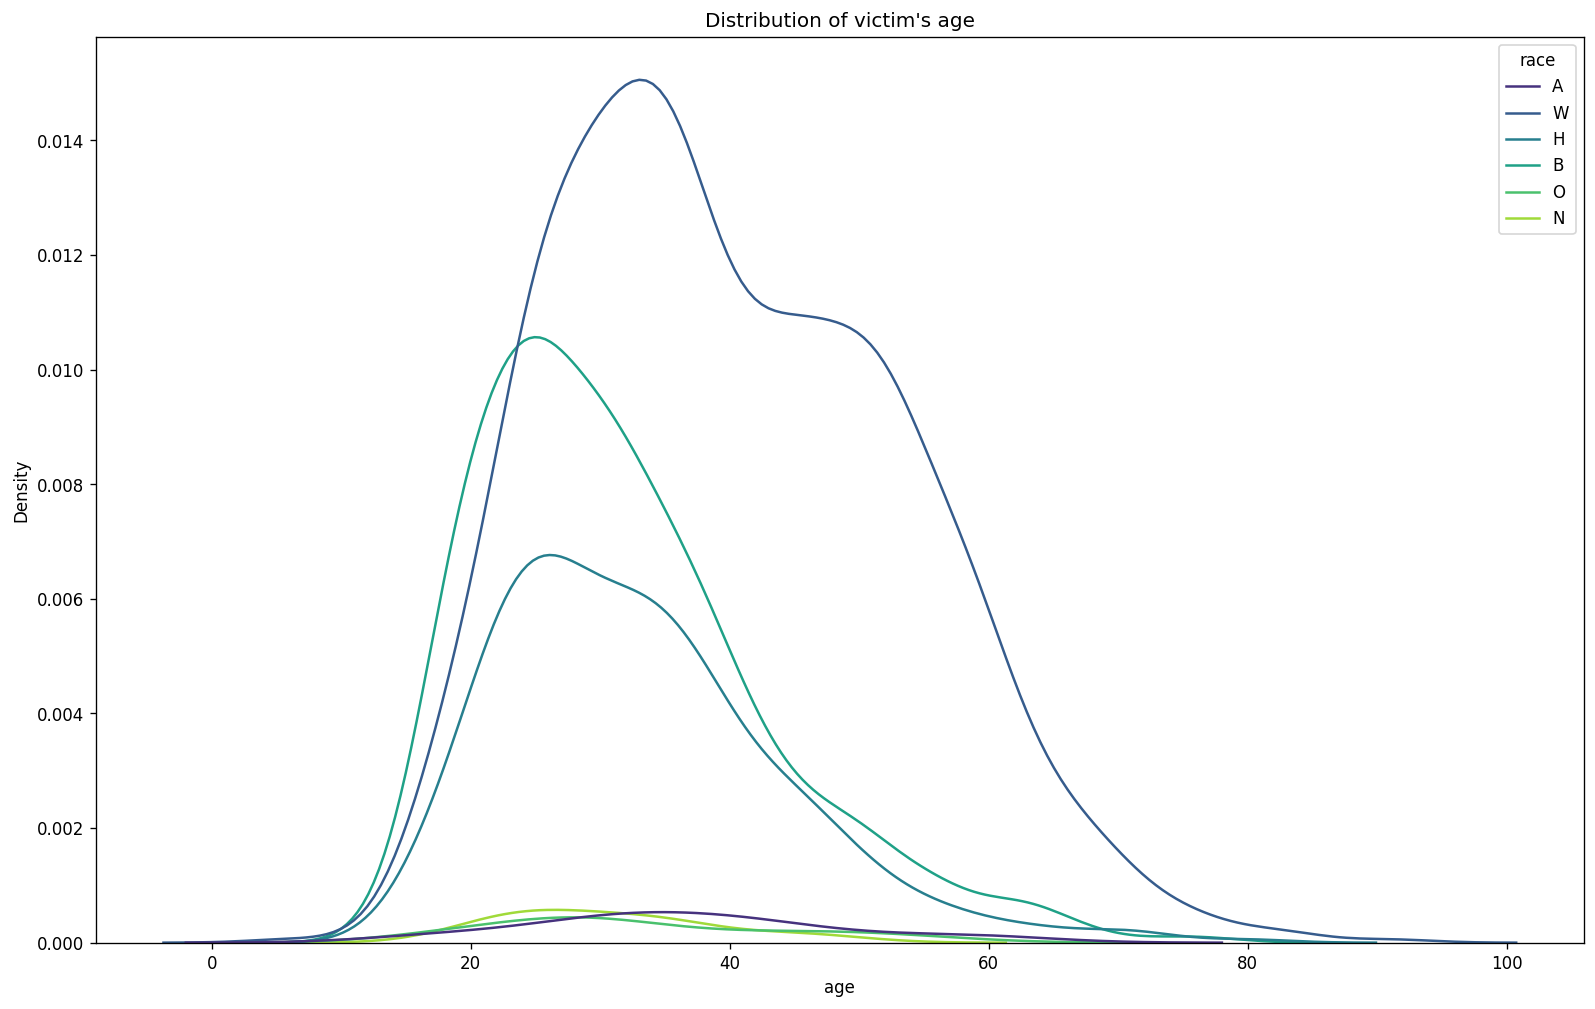

In [ ]:
plt.figure(figsize=(16,10), dpi=120)
plt.title("Distribution of victim's age")
sns.kdeplot(
    data=df_fatalities.rename({'W':'White','B':'Black','H':'Hispanic','A':'Asian','N':'Native American','O':'Others'}), 
    x='age',  
    hue='race',
    palette='viridis'
)
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
fatalities_by_mental_illness = df_fatalities['signs_of_mental_illness'].value_counts()

In [ ]:
px.pie(
    title = 'Relationship between Police Killing Victims and Mental Illness',
    names = fatalities_by_mental_illness.index,
    values = fatalities_by_mental_illness.values,
)

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [ ]:
top_10_cities = df_fatalities['city'].value_counts().sort_values(ascending=False)[:10]
top_10_cities

Los Angeles    35
Phoenix        28
Houston        24
Chicago        22
Austin         18
Las Vegas      17
Columbus       16
San Antonio    15
Miami          15
St. Louis      14
Name: city, dtype: int64

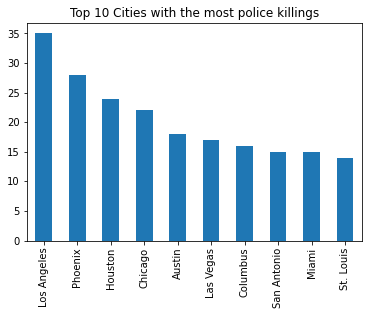

In [ ]:
plt.title('Top 10 Cities with the most police killings')
top_10_cities.plot(kind='bar')

Apparently Los Angeles is the most dangerous city in USA

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [ ]:
top_10_cities_by_race = df_fatalities[df_fatalities['city'].isin(top_10_cities.index.tolist())].groupby(['city','race'])['name'].count().unstack(level=1)
top_10_cities_by_race.fillna(0, inplace=True)
top_10_cities_by_race.rename({'W':'White','B':'Black','H':'Hispanic','A':'Asian','N':'Native American','O':'Others'},axis=1, inplace=True)
top_10_cities_by_race

race,Asian,Black,Hispanic,Native American,Others,White
city,,,,,,
Austin,0.00,3.00,2.00,0.00,0.00,13.00
Chicago,0.00,19.00,1.00,0.00,0.00,2.00
Columbus,0.00,9.00,0.00,0.00,1.00,6.00
Houston,1.00,14.00,5.00,1.00,0.00,3.00
Las Vegas,0.00,3.00,5.00,0.00,0.00,9.00
Los Angeles,1.00,10.00,18.00,0.00,0.00,6.00
Miami,0.00,7.00,6.00,0.00,0.00,2.00
Phoenix,0.00,2.00,11.00,3.00,0.00,12.00
San Antonio,0.00,2.00,11.00,0.00,0.00,2.00


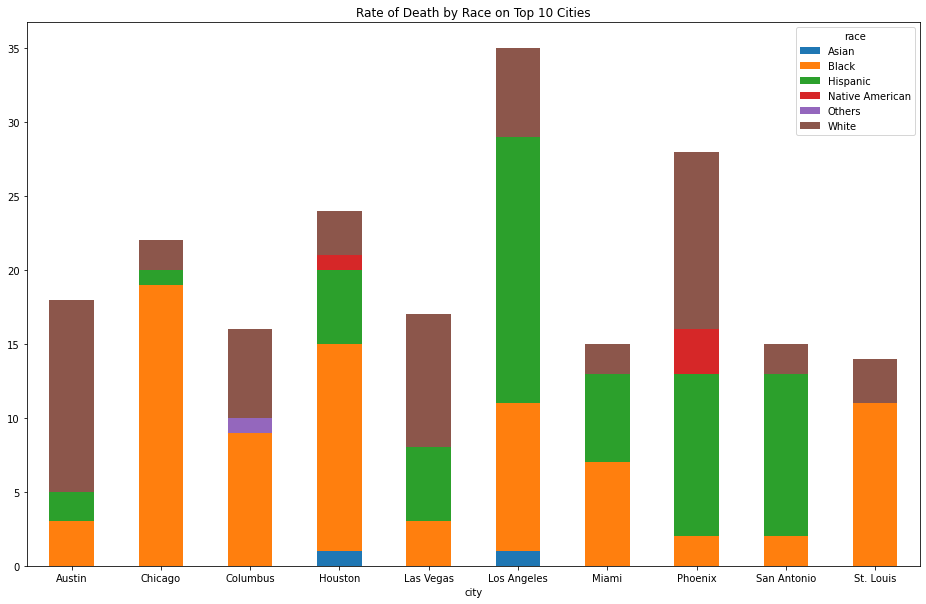

In [ ]:
top_10_cities_by_race.plot(
    kind='bar',
    stacked=True,
    figsize=(16,10),
    title='Rate of Death by Race on Top 10 Cities',
    rot=0
)

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [ ]:
death_by_state = df_fatalities['state'].value_counts().sort_index()

In [ ]:
px.choropleth(
    data_frame = death_by_state,
    locations = death_by_state.index,
    color = death_by_state.values,
    locationmode="USA-states",
    scope='usa',
    title = 'Police Killings b'
)

It seems that degree of poverty don't really affect number of police killings

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [219]:
fatality_by_date = df_fatalities['date'].value_counts().sort_index()
fatality_by_date 

2015-01-03    3
2015-01-04    2
2015-01-06    1
2015-01-07    2
2015-01-08    1
             ..
2017-12-02    2
2017-12-03    2
2017-12-04    1
2017-12-05    3
2017-12-06    4
Name: date, Length: 846, dtype: int64

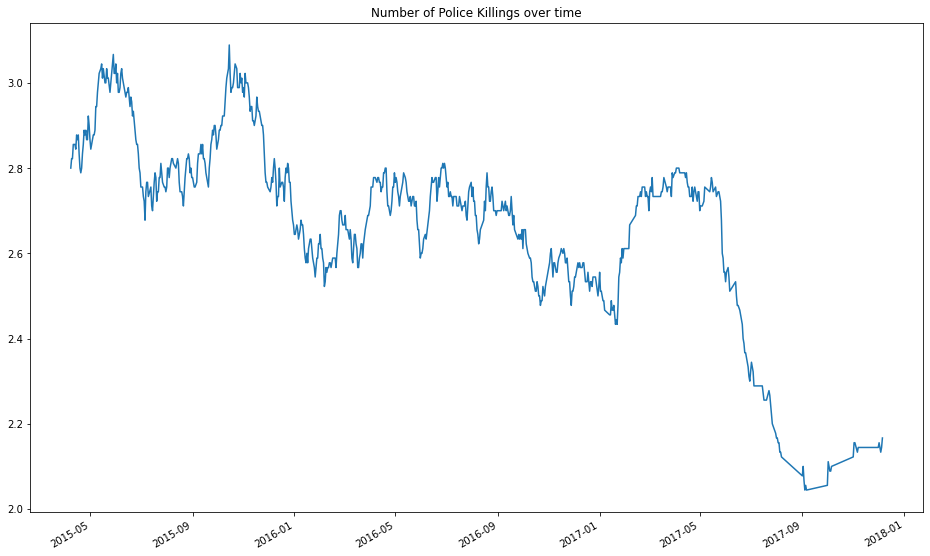

In [224]:
fatality_by_date.rolling(90).mean().plot(
    title='Number of Police Killings over time',
    figsize = (16,10)
)

Over time, the number of police killings seemed to decrease

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).

The results of the analysis seem to differ much, especially in terms of race, because the majority of police killing victims in the dataset are white people. However, if we take a look at the top 10 cities with the most police killings, we can see that there is a large number of hispanic and black race victims